In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas
import millefeuille as mf

In [2]:
data = mf.DataStack()

In [3]:
data['points'] = mf.PointLayer()
data['points']['x'] = np.random.rand(400) * 20 - 10
data['points']['y'] = np.random.rand(400) * 20 - 10
data['points']['a'] = data['points']['x']**2 + data['points']['y']**2

In [21]:
grid = mf.Grid()
grid['x'].points = np.linspace(-10,10,1000)
grid['y'].points = np.linspace(-10,10,1000)
data['grid'] = mf.GridLayer(grid)

In [22]:
bins = mf.Grid()
bins['x'].edges = np.linspace(-10, 10, 21)
bins['y'].edges = np.linspace(-10, 10, 21)
data['hist'] = mf.BinLayer(bins)

In [32]:
data['hist_x'] = mf.BinLayer(mf.Grid(bins['x']))

In [33]:
data.translate(source='points', dest='grid', var='a', method='nearest')

In [34]:
data.translate(source='points', dest='hist', var='a', method='mean')
data.translate(source='points', dest='hist_x', var='a', method='sum')

In [35]:
data['grid']['a'] = np.nan_to_num(data['grid']['a'])

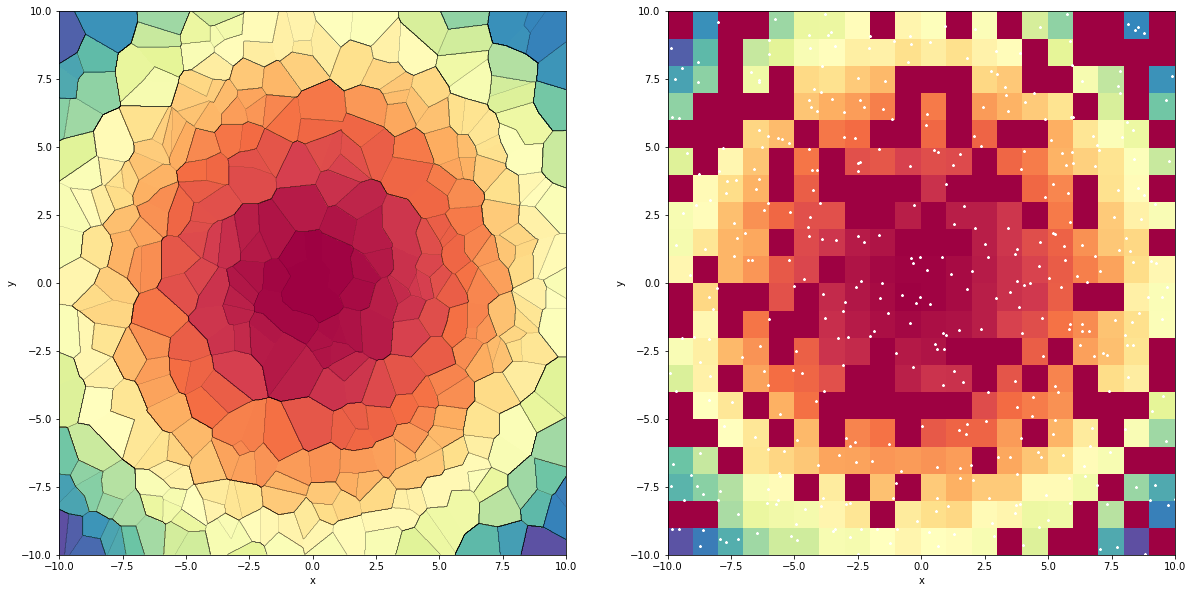

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
data['grid'].plot_map(fig, ax1, 'a', cmap='Spectral')
data['grid'].plot_contour(fig, ax1, 'a', levels=np.linspace(0,200,100), colors='k', linewidths=0.1)
data['hist'].plot_map(fig, ax2, 'a', cmap='Spectral')
data['points'].plot_2d(fig, ax2, 'x', 'y', color='w', s=5, marker='*')

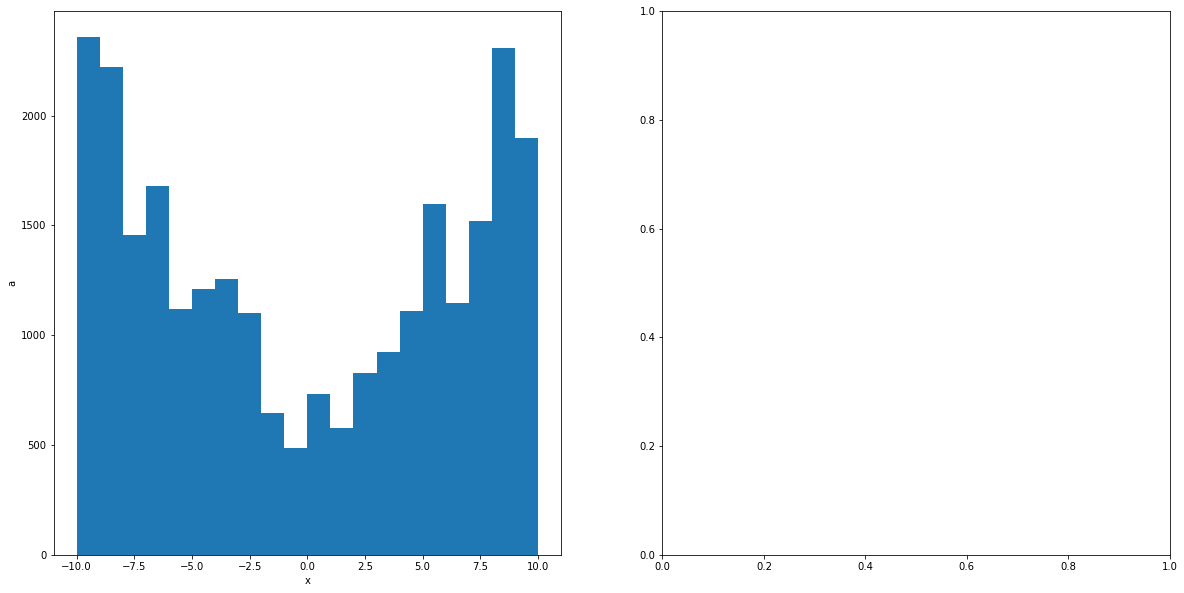

In [45]:
fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
data['hist_x'].plot_step(fig, ax1, 'a')